### In this notebook, I will answer the following question, posed on
### https://fivethirtyeight.com/features/can-you-find-the-best-dungeons-dragons-strategy/?fbclid=IwAR2MJN9VaFJNCdwPfGxt3wP7cGmmoLrJhrQROXKzD5vErLU7_I0jaP-aIWs:


### The fifth edition of Dungeons & Dragons introduced a system of “advantage and disadvantage.” When you roll a die “with advantage,” you roll the die twice and keep the higher result. Rolling “with disadvantage” is similar, except you keep the lower result instead. The rules further specify that when a player rolls with both advantage and disadvantage, they cancel out, and the player rolls a single die. Yawn!

### There are two other, more mathematically interesting ways that advantage and disadvantage could be combined. First, you could have “advantage of disadvantage,” meaning you roll twice with disadvantage and then keep the higher result. Or, you could have “disadvantage of advantage,” meaning you roll twice with advantage and then keep the lower result. With a fair 20-sided die, which situation produces the highest expected roll: advantage of disadvantage, disadvantage of advantage or rolling a single die?

### Extra Credit: Instead of maximizing your expected roll, suppose you need to roll N or better with your 20-sided die. For each value of $N$, is it better to use advantage of disadvantage, disadvantage of advantage or rolling a single die?

# We begin by approximating the expected values using one billion rolls

![EvilUrl](https://media1.tenor.com/images/c7b8258ba0f4f6333a4fd1812e9b01d9/tenor.gif "evil")


In [1]:
import pandas as pd
import numpy as np
from random import randint
import matplotlib.pyplot as plt

In [67]:
#Defining functions for rolling with advantage or disadvantage

def disadvantage():
    d_1 = randint(1,20)
    d_2 = randint(1,20)
    if d_1 <= d_2:
        roll = d_1
    else:
        roll = d_2
    return roll

def advantage():
    d_1 = randint(1,20)
    d_2 = randint(1,20)
    if d_1 >= d_2:
        roll = d_1
    else:
        roll = d_2
    return roll

## Average for Rolling with Disadvantage

In [3]:
#Simulating 1 billion rolls with disadvantage

rolls_dis = np.empty(1000000000)
for i in range(1000000000):
    rolls_dis[i]= disadvantage()


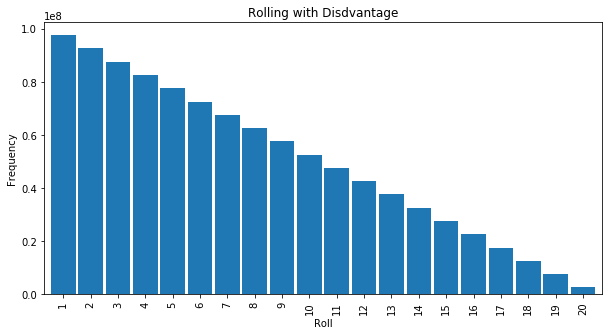

In [59]:
x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
ax = pd.Series(rolls_dis).value_counts().loc[x].plot(kind='bar',
                                    figsize=(10,5),
                                    title='Rolling with Disdvantage', width = 0.90)

ax.set_xlabel('Roll')
ax.set_ylabel('Frequency')
plt.show()

In [64]:
print('Average Roll:', np.mean(rolls_dis))

Average Roll: 7.174982679


## Average for Rolling with Advantage


In [16]:
rolls_adv = np.empty(1000000000)
for i in range(1000000000):
    rolls_adv[i]= advantage()


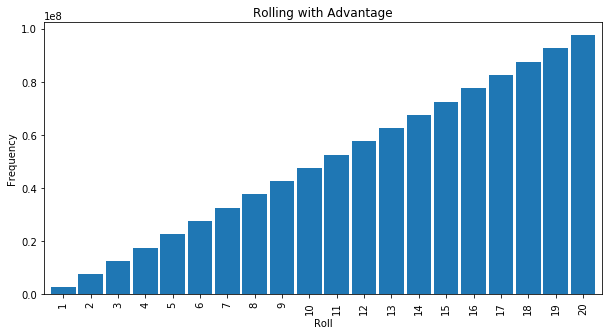

In [60]:
x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
ax = pd.Series(rolls_adv).value_counts().loc[x].plot(kind='bar',
                                    figsize=(10,5),
                                    title='Rolling with Advantage', width = 0.90)

ax.set_xlabel('Roll')
ax.set_ylabel('Frequency')
plt.show()

In [65]:
print('Average Roll:', np.mean(rolls_adv))

Average Roll: 13.824870838


## "Advantage of Disadvantage” 
### roll twice with disadvantage and then keep the higher result

In [18]:
def adv_of_disadv():
    first_roll = disadvantage()
    second_roll = disadvantage()
    roll = np.max([first_roll, second_roll])
    return roll


rolls_adv_of_disadv = np.empty(1000000000)
for i in range(1000000000):
    rolls_adv_of_disadv[i]= adv_of_disadv()

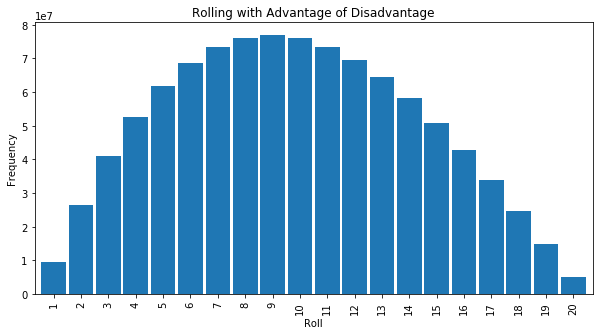

In [61]:
x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
ax = pd.Series(rolls_adv_of_disadv).value_counts().loc[x].plot(kind='bar',
                                    figsize=(10,5),
                                    title='Rolling with Advantage of Disadvantage', width = 0.90)

ax.set_xlabel('Roll')
ax.set_ylabel('Frequency')
plt.show()

In [66]:
print('Average Roll:', np.mean(rolls_adv_of_disadv))

Average Roll: 9.83322416


## "Disdvantage of Advantage” 
### roll twice with advantage and then keep the lower result

In [21]:
def disadv_of_adv():
    first_roll = advantage()
    second_roll = advantage()
    roll = np.min([first_roll, second_roll])
    return roll

rolls_disadv_of_adv = np.empty(1000000000)
for i in range(1000000000):
    rolls_disadv_of_adv[i] = disadv_of_adv()

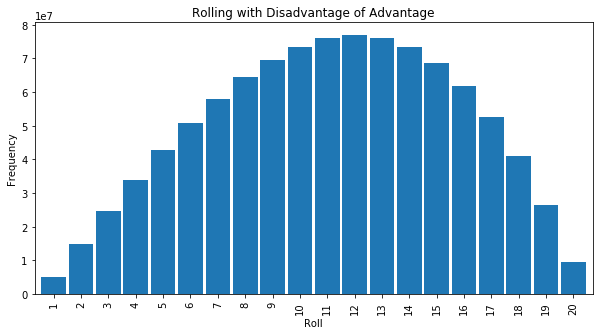

In [62]:
x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
ax = pd.Series(rolls_disadv_of_adv).value_counts().loc[x].plot(kind='bar',
                                    figsize=(10,5),
                                    title='Rolling with Disadvantage of Advantage', width = 0.90)

ax.set_xlabel('Roll')
ax.set_ylabel('Frequency')
plt.show()

In [36]:
print('Average Roll:', np.mean(rolls_disadv_of_adv))

Average Roll: 11.166656299


## Rolling a Single Dice

In [23]:
single_roll = np.empty(1000000000)
for i in range(1000000000):
    single_roll[i] = randint(1,20)

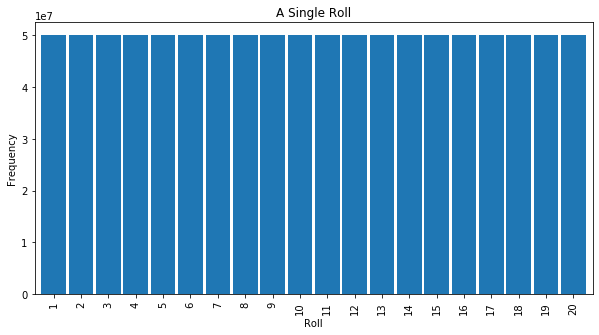

In [63]:
x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
ax = pd.Series(single_roll).value_counts().loc[x].plot(kind='bar',
                                    figsize=(10,5),
                                    title='A Single Roll', width = 0.90)

ax.set_xlabel('Roll')
ax.set_ylabel('Frequency')
plt.show()

In [37]:
print('Average Roll:', np.mean(single_roll))

Average Roll: 10.499844476


# Finding the true Expected Value (using MATH!)

### $E(X) = \sum x_i f(x_i)$, where $f(x_i)$ is the probability that $x_i$ occurs

First, we find the expected value of a single roll

In [78]:
#Using the formula above to find expected value 
total = np.empty(20)
for i in range(20):
    total[i] = (i+1)*(1/20)
print('The expected value for a SINGLE ROLL is', np.sum(total))

The expected value for a SINGLE ROLL is 10.5


### For fun, let's also find the expected value for a roll with disadvantage and with advantage

In [40]:
#Finding all possible combinations of two dice rolls

from itertools import product

combinations = list(product(range(1,21), repeat=2))
len(combinations)

400

In [41]:
#Function for finding the probability of rolling number r, with disadvantage 

def disadv_probability(r):
    count = 0
    for i in range(400):
        if r == np.min(combinations[i]):
            count += 1
    return (count / 400)

def adv_probability(r):
    count = 0
    for i in range(400):
        if r == np.max(combinations[i]):
            count += 1
    return (count / 400)

In [42]:
#Using the formula above to find expected value 

total = np.empty(20)
for i in range(20):
    total[i] = (i+1)*disadv_probability(i+1)
print('The expected value for a roll with DISADVANTAGE is', np.sum(total))

total = np.empty(20)
for i in range(20):
    total[i] = (i+1)*adv_probability(i+1)
print('The expected value for a roll with ADVANTAGE is', np.sum(total))

The expected value for a roll with DISADVANTAGE is 7.175
The expected value for a roll with ADVANTAGE is 13.825


### To find the probabilities of advantage of disadvantage (AoD) and disadvantage of advantage (DoA), we list out all possible combinations of rolling two dice twice

In [43]:
two_rolls_twice = list(product(combinations, repeat=2))
len(two_rolls_twice)

160000

In [44]:
#Function for finding the probability of rolling r, with AoD
def adv_of_disadv_probability(r):
    count = 0
    for n in range(160000):
        disadv = []
        for i,j in two_rolls_twice[n]:
            disadv.append(min(i,j))
        adv = max(disadv)
        if r == adv:
            count += 1
    return (count / 160000)


#Function for finding the probability of rolling r, with DoA
def disadv_of_adv_probability(r):
    count = 0
    for n in range(160000):
        adv = []
        for i,j in two_rolls_twice[n]:
            adv.append(max(i,j))
        disadv = min(adv)
        if r == disadv:
            count += 1
    return (count / 160000)

In [45]:
#Using the formula above to find expected value 

total = np.empty(20)
for m in range(20):
    total[m] = (m+1)*adv_of_disadv_probability(m+1)
print('The expected value for a roll with ADVANTAGE OF DISADVANTAGE is', np.sum(total))


total = np.empty(20)
for p in range(20):
    total[p] = (p+1)*disadv_of_adv_probability(p+1)
print('The expected value for a roll with DISADVANTAGE OF ADVANTAGE is', np.sum(total))

The expected value for a roll with ADVANTAGE OF DISADVANTAGE is 9.833337499999999
The expected value for a roll with DISADVANTAGE OF ADVANTAGE is 11.1666625


## EXTRA CREDIT
### We will use the Probability Mass Function (PMF) and Cumulative Distrabution Function (CDF) to answer this question.

### First, we create some visualizations of the PMFs and CDFs: for each type of roll (Single roll, AoD, and DoA), we provide graphs of 1) the PMF, 2) the CDF (with two variations of this graph), and 3) the CDF overlaying the PMF. We then pairwise compare the CDF's of the different types of rolls (again, with two variations of the graphs).

### Finally, we use the PMF to explicitly calculate the answer (the impatient reader may skip to the very bottom of this page to find the answer)

#### Please note: I am a little shakey with graphing CDF's on python. Hopefully you can understand what I'm going for. Any help would be much appreciated!

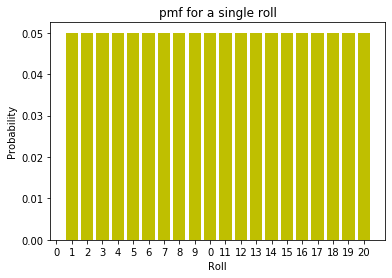

In [46]:
pmf = {}
for i in range(20):
    pmf[i+1] = 1/20

    
plt.bar(list(pmf.keys()), pmf.values(), color='y')

plt.xlabel('Roll')
plt.ylabel('Probability')

x = [0,1,2,3,4,5,6,7,8,9,0,11,12,13,14,15,16,17,18,19,20]
xi = list(range(len(x)))
plt.xticks(xi, x)
plt.title('pmf for a single roll')
plt.show()

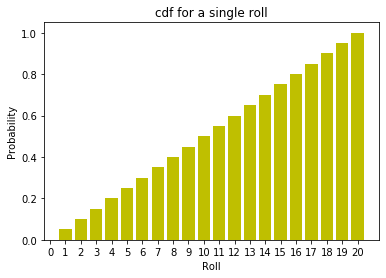

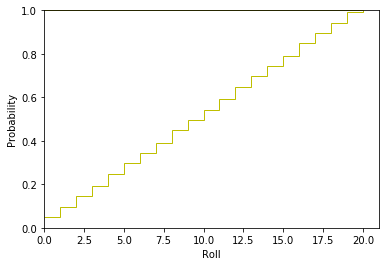

In [47]:
cdf_values = np.cumsum(list(pmf.values()))

cdf = {}
for i in range(20):
    cdf[i+1] = cdf_values[i]


plt.bar(list(cdf.keys()), cdf.values(), color='y')

plt.xlabel('Roll')
plt.ylabel('Probability')

x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
xi = list(range(len(x)))
plt.xticks(xi, x)
plt.title('cdf for a single roll')
plt.show()



fig, ax = plt.subplots()

n, bins, patches = ax.hist(
    pd.Series(cdf), cumulative=1, histtype='step', bins=100, color='y', orientation = 'horizontal')
ax.set_ylim((ax.get_xlim()[0], pd.Series(cdf).max()+0.0001))

plt.xlabel('Roll')
plt.ylabel('Probability')
plt.show()

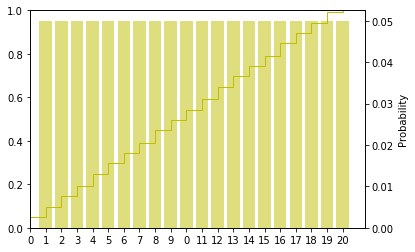

In [48]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
plt.bar(list(pmf.keys()), pmf.values(), color='y', alpha = 0.5)

plt.xlabel('Roll')
plt.ylabel('Probability')

x = [0,1,2,3,4,5,6,7,8,9,0,11,12,13,14,15,16,17,18,19,20]
xi = list(range(len(x)))
plt.xticks(xi, x)
n, bins, patches = ax.hist(
    pd.Series(cdf), cumulative=1, histtype='step', bins=100, color='y', orientation = 'horizontal')
ax.set_ylim((ax.get_xlim()[0], pd.Series(cdf).max()+0.0001))


plt.show()

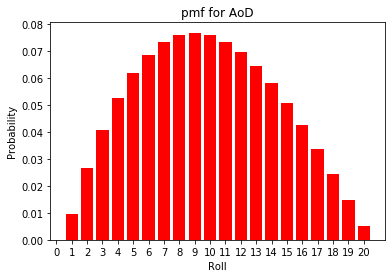

In [49]:
pmf_2 = {}
for i in range(20):
    pmf_2[i+1] = adv_of_disadv_probability(i+1)

    
plt.bar(list(pmf_2.keys()), pmf_2.values(), color='r')

plt.xlabel('Roll')
plt.ylabel('Probability')

x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
xi = list(range(len(x)))
plt.xticks(xi, x)
plt.title('pmf for AoD')
plt.show()

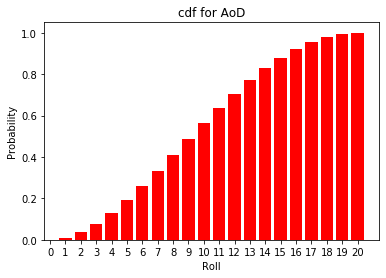

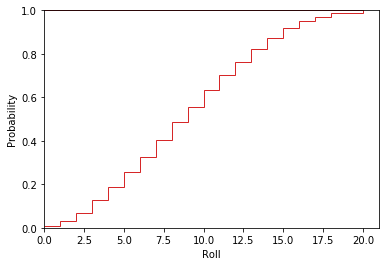

In [50]:
cdf_2_values = np.cumsum(list(pmf_2.values()))

cdf_2 = {}
for i in range(20):
    cdf_2[i+1] = cdf_2_values[i]
    
plt.bar(list(cdf_2.keys()), cdf_2.values(), color='r')

plt.xlabel('Roll')
plt.ylabel('Probability')

x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
xi = list(range(len(x)))
plt.xticks(xi, x)
plt.title('cdf for AoD')
plt.show()


fig, ax = plt.subplots()

n, bins, patches = ax.hist(
    pd.Series(cdf_2), cumulative=1, histtype='step', bins=100, color='tab:red', orientation = 'horizontal')
ax.set_ylim((ax.get_xlim()[0], pd.Series(cdf_2).max()+0.0001))

plt.xlabel('Roll')
plt.ylabel('Probability')
plt.show()

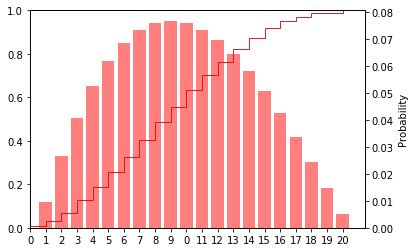

In [51]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
plt.bar(list(pmf_2.keys()), pmf_2.values(), color='r', alpha = 0.5)

plt.xlabel('Roll')
plt.ylabel('Probability')

x = [0,1,2,3,4,5,6,7,8,9,0,11,12,13,14,15,16,17,18,19,20]
xi = list(range(len(x)))
plt.xticks(xi, x)
n, bins, patches = ax.hist(
    pd.Series(cdf_2), cumulative=1, histtype='step', bins=100, color='tab:red', orientation = 'horizontal')
ax.set_ylim((ax.get_xlim()[0], pd.Series(cdf_2).max()+0.0001))


plt.show()

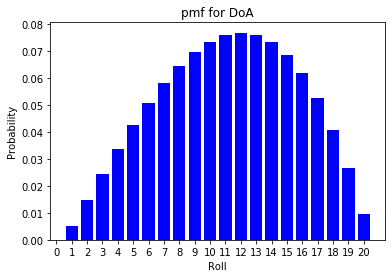

In [52]:
pmf_3 = {}
for i in range(20):
    pmf_3[i+1] = disadv_of_adv_probability(i+1)

    
plt.bar(list(pmf_3.keys()), pmf_3.values(), color='b')

plt.xlabel('Roll')
plt.ylabel('Probability')

x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
xi = list(range(len(x)))
plt.xticks(xi, x)
plt.title('pmf for DoA')
plt.show()

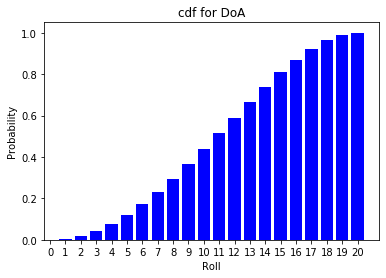

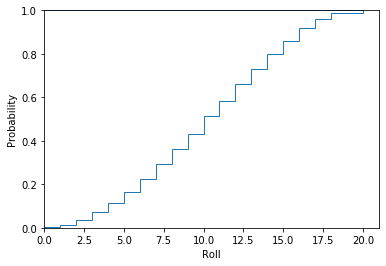

In [53]:
cdf_3_values = np.cumsum(list(pmf_3.values()))

cdf_3 = {}
for i in range(20):
    cdf_3[i+1] = cdf_3_values[i]
    
plt.bar(list(cdf_3.keys()), cdf_3.values(), color='b')

plt.xlabel('Roll')
plt.ylabel('Probability')

x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
xi = list(range(len(x)))
plt.xticks(xi, x)
plt.title('cdf for DoA')
plt.show()


fig, ax = plt.subplots()

n, bins, patches = ax.hist(
    pd.Series(cdf_3), cumulative=1, histtype='step', bins=100, color='tab:blue', orientation = 'horizontal')
ax.set_ylim((ax.get_xlim()[0], pd.Series(cdf_3).max()+0.0001))

plt.xlabel('Roll')
plt.ylabel('Probability')
plt.show()

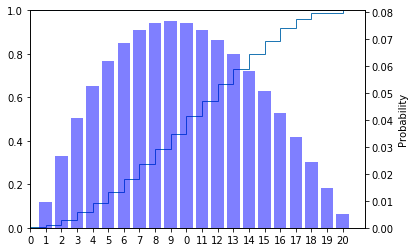

In [54]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
plt.bar(list(pmf_3.keys()), pmf_2.values(), color='b', alpha = 0.5)

plt.xlabel('Roll')
plt.ylabel('Probability')

x = [0,1,2,3,4,5,6,7,8,9,0,11,12,13,14,15,16,17,18,19,20]
xi = list(range(len(x)))
plt.xticks(xi, x)
n, bins, patches = ax.hist(
    pd.Series(cdf_3), cumulative=1, histtype='step', bins=100, color='tab:blue', orientation = 'horizontal')
ax.set_ylim((ax.get_xlim()[0], pd.Series(cdf_3).max()+0.0001))


plt.show()

### Comparing CDF's

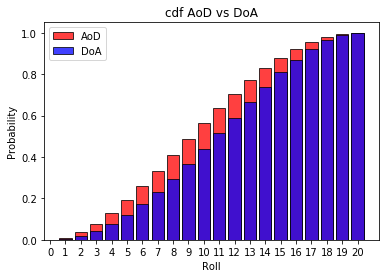

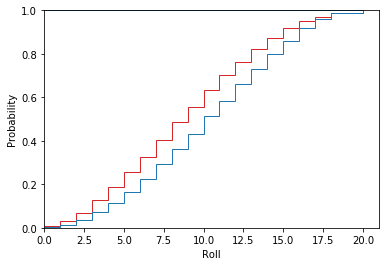

In [55]:

plt.bar(list(cdf_2.keys()), cdf_2.values(), label = 'AoD', color='r', alpha=0.75, edgecolor='black')
plt.bar(list(cdf_3.keys()), cdf_3.values(),label = 'DoA', color='b', alpha=0.75, edgecolor='black')
plt.legend()
plt.xlabel('Roll')
plt.ylabel('Probability')
x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
xi = list(range(len(x)))
plt.xticks(xi, x)
plt.title('cdf AoD vs DoA')
plt.show()




fig, ax = plt.subplots()

n, bins, patches = ax.hist(
    pd.Series(cdf_2), cumulative=1, histtype='step', bins=100, color='tab:red', orientation = 'horizontal')
ax.set_ylim((ax.get_xlim()[0], pd.Series(cdf_2).max()+0.0001))

n, bins, patches = ax.hist(
    pd.Series(cdf_3), cumulative=1, histtype='step', bins=100, color='tab:blue', orientation = 'horizontal')
ax.set_ylim((ax.get_xlim()[0], pd.Series(cdf_3).max()+0.0001))

plt.xlabel('Roll')
plt.ylabel('Probability')
plt.show()

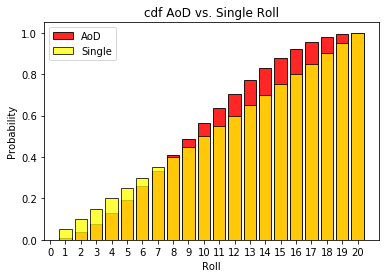

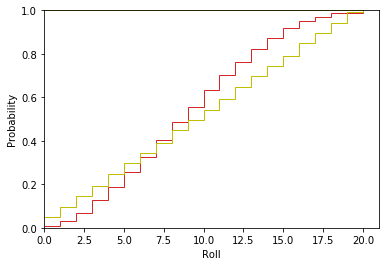

In [56]:
plt.bar(list(cdf_2.keys()), cdf_2.values(), label = 'AoD', color='r', alpha=0.85, edgecolor='black')

plt.bar(list(cdf.keys()), cdf.values(), label = 'Single', color='yellow', alpha=0.75, edgecolor='black')

plt.legend()

plt.xlabel('Roll')
plt.ylabel('Probability')

x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
xi = list(range(len(x)))
plt.xticks(xi, x)
plt.title('cdf AoD vs. Single Roll')
plt.show()


fig, ax = plt.subplots()
n, bins, patches = ax.hist(
    pd.Series(cdf_2), cumulative=1, histtype='step', bins=100, color='tab:red', orientation = 'horizontal')
ax.set_ylim((ax.get_xlim()[0], pd.Series(cdf_2).max()+0.0001))

n, bins, patches = ax.hist(
    pd.Series(cdf), cumulative=1, histtype='step', bins=100, color='y', orientation = 'horizontal')
ax.set_ylim((ax.get_xlim()[0], pd.Series(cdf).max()+0.0001))

plt.xlabel('Roll')
plt.ylabel('Probability')
plt.show()


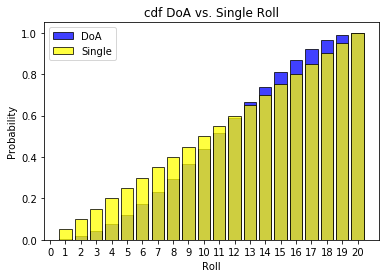

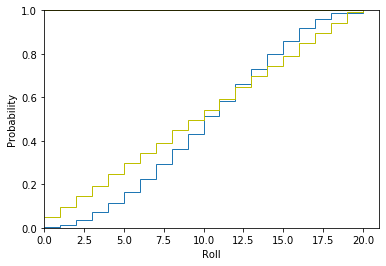

In [57]:

plt.bar(list(cdf_3.keys()), cdf_3.values(),label = 'DoA', color='b', alpha=0.75, edgecolor='black')
plt.bar(list(cdf.keys()), cdf.values(), label = 'Single', color='yellow', alpha=0.75, edgecolor='black')

plt.legend()

plt.xlabel('Roll')
plt.ylabel('Probability')

x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
xi = list(range(len(x)))
plt.xticks(xi, x)
plt.title('cdf DoA vs. Single Roll')
plt.show()


fig, ax = plt.subplots()
n, bins, patches = ax.hist(
    pd.Series(cdf_3), cumulative=1, histtype='step', bins=100, color='tab:blue', orientation = 'horizontal')
ax.set_ylim((ax.get_xlim()[0], pd.Series(cdf_3).max()+0.0001))

n, bins, patches = ax.hist(
    pd.Series(cdf), cumulative=1, histtype='step', bins=100, color='y', orientation = 'horizontal')
ax.set_ylim((ax.get_xlim()[0], pd.Series(cdf).max()+0.0001))

plt.xlabel('Roll')
plt.ylabel('Probability')
plt.show()

### The graphs of the CDF's and PMF's were moreso just for fun. Once we have the CDF, we can easily calculate the probabilty of rolling $N$ or higher. Evaluating the CDF at a given function (say $x$) will tell us the probability of rolling $x$ or lower. Thus, 1 minus the CDF evaluated at $x$ will tell us the probability of rolling $x+1$ or higher. This is the idea behind the following code:

In [58]:
types = ['Single Die Roll', 'AoD', 'DoA']
for i in range(19):
    print('The greatest probability of rolling a', i+2, 'or above is', 
          round(np.max([1-list(cdf.values())[i], 1-list(cdf_2.values())[i], 1-list(cdf_3.values())[i]]), 4), 
         '(achieved by ', types[np.argmax([1-list(cdf.values())[i], 1-list(cdf_2.values())[i], 1-list(cdf_3.values())[i]])],')')
    
    
    

The greatest probability of rolling a 2 or above is 0.995 (achieved by  DoA )
The greatest probability of rolling a 3 or above is 0.9801 (achieved by  DoA )
The greatest probability of rolling a 4 or above is 0.9555 (achieved by  DoA )
The greatest probability of rolling a 5 or above is 0.9216 (achieved by  DoA )
The greatest probability of rolling a 6 or above is 0.8789 (achieved by  DoA )
The greatest probability of rolling a 7 or above is 0.8281 (achieved by  DoA )
The greatest probability of rolling a 8 or above is 0.77 (achieved by  DoA )
The greatest probability of rolling a 9 or above is 0.7056 (achieved by  DoA )
The greatest probability of rolling a 10 or above is 0.636 (achieved by  DoA )
The greatest probability of rolling a 11 or above is 0.5625 (achieved by  DoA )
The greatest probability of rolling a 12 or above is 0.4865 (achieved by  DoA )
The greatest probability of rolling a 13 or above is 0.4096 (achieved by  DoA )
The greatest probability of rolling a 14 or above is